In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
#Part 1: Data Loading

In [4]:
#1. Load the california_housing.csv file using pandas.

In [6]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
housing = fetch_california_housing(as_frame=True)
df = housing.frame
# Now df is your full California Housing dataset!
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [8]:
#2. Display the first 5 rows.

In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing=fetch_california_housing(as_frame=True)
df=housing.frame

print("First 5 Rows")
print(df.head)


First 5 Rows
<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37 

In [17]:
#3.Print the column names and their data types

print("\nData Types:")
print(df.dtypes)


Data Types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [20]:
#4.Check for missing values in the dataset

In [22]:
print("\nQuestion 4: Missing values per column:")
print(df.isnull().sum())


Question 4: Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [25]:
#5. Get basic statistical summaries using .describe().

In [27]:
print("\nQuestion 5: Statistical summaries:")
print(df.describe())


Question 5: Statistical summaries:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.15395

In [36]:
#Part 2: Data Cleaning

In [40]:
#6. Check for and remove any duplicated rows.

In [42]:
print("Duplicates rows before removal:{df.duplicated().sum()}")

df.drop_duplicates(inplace=True)

print("Duplicates rows after removal:{df.duplicated().sum()}")

Duplicates rows before removal:{df.duplicated().sum()}
Duplicates rows after removal:{df.duplicated().sum()}


In [45]:
#7. Handle missing values if any:
## Fill missing numerical features with the mean value

In [47]:
print("Missing values before handling:\n", df.isnull().sum())


numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

print("\nMissing values after handling:\n", df.isnull().sum())

Missing values before handling:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Missing values after handling:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [50]:
#8. Create a new column PricePerRoom = median_house_value / total_rooms

In [60]:
df["PricePerRoom"]=df["MedHouseVal"]/df["AveRooms"]

print("\n PricePerRoom Column")
print(df[["AveRooms","MedHouseVal","PricePerRoom"]].head())


 PricePerRoom Column
   AveRooms  MedHouseVal  PricePerRoom
0  6.984127        4.526      0.648041
1  6.238137        3.585      0.574691
2  8.288136        3.521      0.424824
3  5.817352        3.413      0.586693
4  6.281853        3.422      0.544744


In [63]:
#9. Create a column HighPopulationArea:
##○ 1 if population > 500, else 0.

In [67]:
df['HighPopulationArea'] = (df['Population'] > 500).astype(int)

print("\nHighPopulationArea counts:")
print(df['HighPopulationArea'].value_counts())


HighPopulationArea counts:
HighPopulationArea
1    18660
0     1980
Name: count, dtype: int64


In [70]:
#10.Bin the median_income into 5 equal-sized bins and label them as Very Low, Low, Medium,High, Very High.

In [74]:
income_bins = [0, 1.5, 3.0, 4.5, 6.0, float('inf')]
income_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Bin the income
df['Income_Category'] = pd.cut(
    df['MedInc'],
    bins=income_bins,
    labels=income_labels
)

print("\nIncome categories distribution:")
print(df['Income_Category'].value_counts().sort_index())


Income categories distribution:
Income_Category
Very Low      822
Low          6581
Medium       7236
High         3639
Very High    2362
Name: count, dtype: int64


In [77]:
#11. Drop columns that seem redundant after feature creation (if any)

In [79]:
print("\nCurrent columns:", df.columns.tolist())


Current columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal', 'PricePerRoom', 'HighPopulationArea', 'Income_Category']


In [82]:
#Verification of All Changes

In [84]:
print("\nFinal cleaned dataset preview:")
print(df.head())

print("\nNew columns added:")
print(df[['PricePerRoom', 'HighPopulationArea', 'Income_Category']].head())


Final cleaned dataset preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  PricePerRoom  HighPopulationArea Income_Category  
0    -122.23        4.526      0.648041                   0       Very High  
1    -122.22        3.585      0.574691                   1       Very High  
2    -122.24        3.521      0.424824                   0       Very High  
3    -122.25        3.413      0.586693                   1            High  
4    -122.25        3.422      0.544744                   1          Medium  

New columns added:
   PricePerRoom  HighPo

In [88]:
#Part 3: Data Visualization

In [90]:
#12. Plot the distribution of median_house_value with a histogram

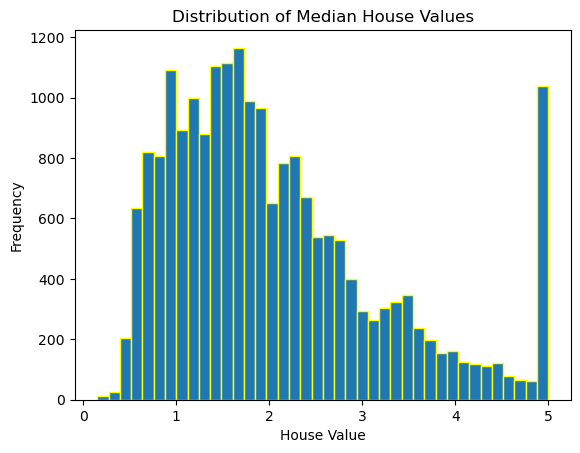

In [96]:
import matplotlib.pyplot as plt

plt.hist(df['MedHouseVal'], bins=40, edgecolor='yellow')
plt.title('Distribution of Median House Values')
plt.xlabel('House Value')
plt.ylabel('Frequency')
plt.show()

In [99]:
#13. Create a scatter plot of longitude vs latitude, colored by median_house_value.

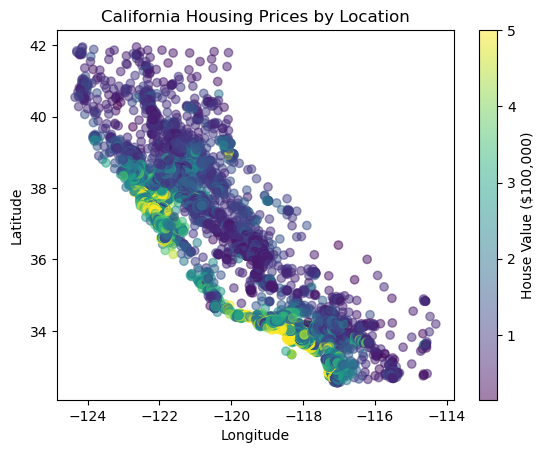

In [101]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='viridis', alpha=0.5)
plt.colorbar(label='House Value ($100,000)')
plt.title('California Housing Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [104]:
#14. Plot a boxplot of median_house_value grouped by the new income categories

C:\Users\Gouri\AppData\Local\Temp\ipykernel_2268\1499936446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Income_Category', y='MedHouseVal', palette='Blues')


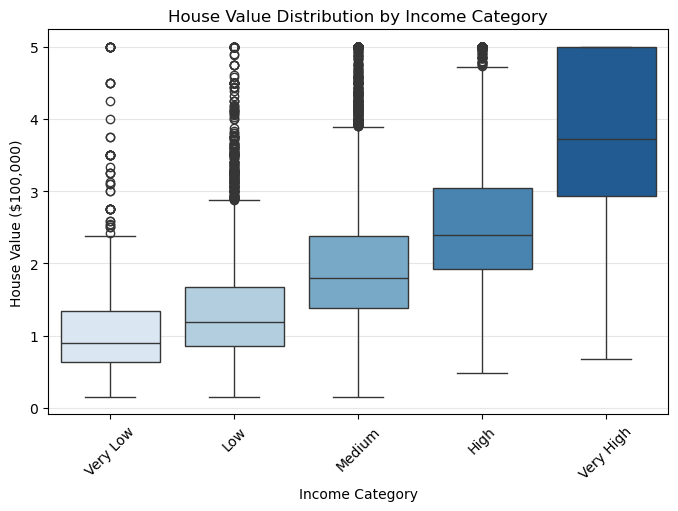

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Income_Category', y='MedHouseVal', palette='Blues')
plt.title('House Value Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('House Value ($100,000)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [113]:
#15. Plot the correlation matrix heatmap between numerical features.

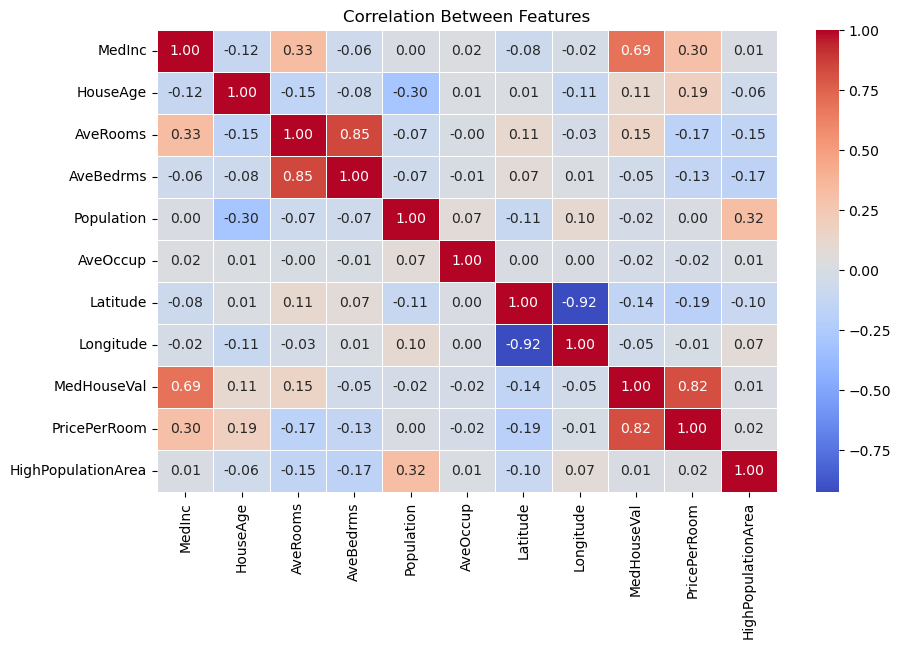

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Features')
plt.show()

In [133]:
#16. Create a bar plot showing average median_house_value for high population vs low population areas.

#Create a pairplot (sns.pairplot) for selected features: median_income, housing_median_age,median_house_value.

C:\Users\Gouri\AppData\Local\Temp\ipykernel_2268\1583759074.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='HighPopulationArea', y='MedHouseVal', ci=None, palette='pastel')
C:\Users\Gouri\AppData\Local\Temp\ipykernel_2268\1583759074.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='HighPopulationArea', y='MedHouseVal', ci=None, palette='pastel')


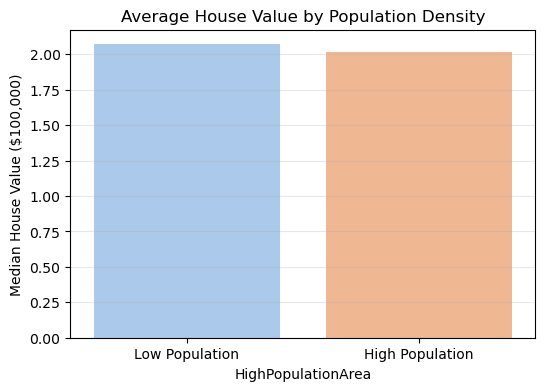

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns


df['HighPopulationArea'] = (df['Population'] > 5000).astype(int)

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='HighPopulationArea', y='MedHouseVal', ci=None, palette='pastel')
plt.title('Average House Value by Population Density')
plt.xticks([0, 1], ['Low Population', 'High Population'])
plt.ylabel('Median House Value ($100,000)')
plt.grid(axis='y', alpha=0.3)
plt.show()